In [ ]:
import json
from random import Random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

from virtual_lab.agent import Agent
from virtual_lab.constants import CREATIVE_TEMPERATURE
from virtual_lab.run_meeting import run_meeting

from nanobody_constants import (
    discussions_phase_to_dir,
    generic_agent,
    generic_team_lead,
    principal_investigator,
    num_rounds,
    model,
)

## Setup

In [2]:
human_eval_dir = discussions_phase_to_dir["human_eval"]
human_eval_dir.mkdir(parents=True, exist_ok=True)

blinded_dir = human_eval_dir / "blinded"
blinded_dir.mkdir(parents=True, exist_ok=True)

## Run discussions

In [ ]:
protein_engineering_agendas = [
    """Structural Analysis of Emerging Viral Antigens for Rapid Therapeutic Design

Problem Statement: Emerging viral pathogens present unpredictable structural variation in surface antigens, limiting the efficacy of vaccines and therapeutic antibodies. Rapid structural insights are essential for guiding immunogen and antibody design.

Research Question: How can structural analysis of novel viral antigens in complex with neutralizing antibodies inform the rational design of broadly protective therapeutics and vaccines?""",
    """Mechanistic Study of Host Receptors Exploited by Bacterial Pathogens

Problem Statement: Many bacterial pathogens exploit host membrane receptors for adhesion, invasion, or immune evasion, yet the molecular details of these interactions remain poorly characterized.

Research Question: What are the structural and biochemical mechanisms by which bacterial virulence factors interact with human receptors, and how can these interactions be targeted to prevent infection?""",
    """Engineering Stable Glycoprotein Antigens for Next-Gen Vaccines

Problem Statement: Viral glycoproteins are often structurally unstable, making it challenging to preserve native conformations for effective vaccine design.

Research Question: How can we rationally engineer viral glycoproteins to enhance their structural stability and immunogenic fidelity for use as next-generation vaccine antigens?""",
    """Structural Characterization of AAV Capsid Variants for Improved Gene Delivery

Problem Statement: The efficiency and specificity of AAV-based gene therapies are limited by immune recognition and suboptimal tissue targeting.

Research Question: How do engineered modifications to AAV capsids alter their structure and receptor-binding properties, and how can these insights be used to optimize gene delivery vectors?""",
    """Mapping the Structural Landscape of Human Immune Receptors in Autoimmunity

Problem Statement: Genetic variations in immune receptors are associated with autoimmune diseases, but the structural mechanisms underlying altered signaling remain unclear.

Research Question: How do disease-associated mutations in immune receptors impact their three-dimensional structure and function, and what are the implications for autoimmune pathogenesis?""",
    """Integrated Structural-Functional Pipeline for Membrane Transporter Drug Targeting

Problem Statement: Membrane transporters are key drug targets, yet their conformational dynamics and ligand specificity are poorly understood, limiting rational drug development.

Research Question: How can an integrated structural and biochemical approach elucidate the mechanisms of transporter function and enable the discovery of selective modulators?""",
    """Structural Proteomics of Host Factors in Viral Replication Complexes

Problem Statement: Viruses rely on host proteins for replication, but the composition and architecture of these host-pathogen complexes are incompletely defined.

Research Question: What are the structural and functional roles of host proteins in viral replication complexes, and how can these insights be leveraged to disrupt viral life cycles?""",
    """Cryo-EM-Based Discovery of Allosteric Sites in Membrane Enzymes

Problem Statement: Allosteric regulation of membrane-bound enzymes offers a route to specific modulation, but identifying such regulatory sites is challenging due to structural complexity.

Research Question: How can cryo-EM and computational modeling be used to identify and characterize allosteric sites in membrane enzymes for targeted drug discovery?""",
]

In [ ]:
computational_biology_agendas = [
    """Generative AI for Personalized Drug Discovery

Problem: Traditional drug discovery pipelines are slow, expensive, and rarely tailored to individual genetic profiles.

Research Question: How can generative AI models be designed to synthesize novel, patient-specific drug compounds based on genomic and clinical data?""",
    """Enhancing Trustworthiness in Clinical AI Systems

Problem: AI models in healthcare often function as "black boxes," making their decisions difficult for clinicians to interpret and trust.

Research Question: What methods can be developed to increase the interpretability and reliability of clinical AI systems without compromising their performance?""",
    """AI-Driven Analysis of Histopathological Images

Problem: Manual interpretation of histopathological images is time-consuming and subject to variability among pathologists.

Research Question: Can deep learning models be trained to accurately detect pathological features in histology images to assist in cancer diagnosis?""",
    """Bias Mitigation in AI Language Models for Healthcare

Problem: AI language models used in healthcare may propagate or exacerbate biases, especially affecting patients from underrepresented groups.

Research Question: What algorithmic and data-centric strategies can reduce bias in language models used in clinical communication?""",
    """Federated Learning for Rare Disease Research

Problem: Research on rare diseases is hindered by data scarcity and privacy concerns that prevent data sharing across institutions.

Research Question: How can federated learning be implemented to enable collaborative modeling of rare diseases without compromising patient privacy?""",
    """AI-Augmented Clinical Trial Design

Problem: Inefficient trial design can lead to costly and inconclusive clinical studies.

Research Question: Can AI models improve clinical trial design by optimizing patient selection, endpoint identification, and trial parameters?""",
    """Multi-Modal Models for Integrative Health Data

Problem: Healthcare data are fragmented across different modalities—imaging, genomics, EHRs—limiting comprehensive patient analysis.

Research Question: How can multi-modal machine learning models integrate heterogeneous healthcare data to improve diagnostic and prognostic accuracy?""",
    """Data Valuation Techniques in Biomedical Research

Problem: The relative value of individual data contributions in training biomedical AI models is poorly understood, impacting data-sharing incentives.

Research Question: What techniques can be used to quantify the marginal utility of data points in biomedical datasets?""",
    """AI Tools for Simplifying Medical Documentation

Problem: Many patients struggle to understand complex medical documentation, affecting their ability to make informed decisions.

Research Question: How can AI systems be designed to automatically translate complex medical texts into simpler, more accessible language?""",
    """Predictive Modeling for Early Disease Detection

Problem: Diseases such as Alzheimer's and cancer are often detected too late for optimal intervention.

Research Question: Can machine learning models analyze longitudinal health data to predict the early onset of high-impact diseases?""",
]

In [ ]:
protein_engineering_questions_2 = [
    """Identifying Molecular Mimicry Candidates Between Human Proteins and Pathogens

Research Question: How can we predict if a pathogen sequence might be affecting its host via molecular mimicry, either at the sequence or structure level?""",
    """Development of Novel Fusion Tags

Research Question: How can we discover and evaluate new fusion tag candidates using computational and experimental approaches?""",
]

In [ ]:
computational_biology_agendas_2 = [
    """Robustness of AI Models to Distribution Shifts in Healthcare
    
Problem: AI models trained on data from a single hospital or demographic may perform poorly when deployed in different clinical settings.
    
Research Question: How can machine learning models be made more robust to distribution shifts across different hospitals, populations, and devices in healthcare applications?""",
    """Detecting Medical Misinformation on Social Media Using AI
    
Problem: Health-related misinformation online undermines public trust and leads to harmful behaviors.
    
Research Question: Can natural language processing and machine learning techniques be used to automatically detect and categorize medical misinformation across social media platforms?""",
    """Self-Supervised Learning for Biomedical Signal Processing
    
Problem: Annotated biomedical signal data (e.g., ECG, EEG) are scarce, limiting the effectiveness of supervised learning models.
    
Research Question: How can self-supervised learning be applied to biomedical time series to improve downstream task performance with minimal labeled data?""",
    """AI for Identifying Subtypes in Heterogeneous Diseases
    
Problem: Diseases like autism or depression are clinically heterogeneous, making diagnosis and treatment inconsistent.
    
Research Question: Can unsupervised learning models identify meaningful subtypes of heterogeneous diseases using multi-modal patient data?""",
    """Real-Time Monitoring of Patient Deterioration in ICUs
Problem: Early signs of patient deterioration in intensive care units (ICUs) can be subtle and missed by current monitoring systems.
Research Question: Can machine learning models be developed to provide real-time, high-sensitivity predictions of patient deterioration using streaming ICU data?""",
    """Modeling Gene-Environment Interactions at Scale
    
Problem: The interplay between genetic predispositions and environmental factors is poorly understood in complex diseases.
    
Research Question: How can scalable machine learning frameworks be designed to model high-dimensional gene-environment interactions using population biobank data?""",
    """Personalized Risk Scoring for Preventive Medicine
    
Problem: Current risk prediction models often fail to account for the full individuality of patient profiles.
    
Research Question: How can deep learning be used to develop personalized, dynamic risk scores for chronic disease onset using longitudinal EHR and lifestyle data?""",
    """AI-Assisted Design of CRISPR Guide RNAs
    
Problem: Designing effective and specific CRISPR guide RNAs remains challenging due to off-target effects.
    
Research Question: Can deep learning models be trained on CRISPR efficacy and off-target datasets to predict optimal guide RNA sequences for gene editing?""",
    """Modeling the Impact of Health Policy with Causal Inference
    
Problem: It is difficult to isolate the causal impact of health policies (e.g., telehealth expansion) from observational data.
    
Research Question: How can causal machine learning methods be applied to EHR and public health datasets to evaluate the real-world effects of health interventions and policies?""",
    """Democratizing AI in Healthcare with No-Code Tools
    
Problem: Many healthcare professionals lack the technical expertise to develop or deploy AI models.
    
Research Question: What are effective methods for building interpretable, no-code AI platforms that allow clinicians to design, validate, and deploy predictive models using their own data?""",
]

In [ ]:
agendas = protein_engineering_agendas + computational_biology_agendas + protein_engineering_questions_2 + computational_biology_agendas_2

In [ ]:
# Create scientist teams
for num, agenda in enumerate(agendas):
    selection_agenda = f"""{agenda}

You need to select a team of scientists to help you with this project. Please select the team members that you would like to invite to a discussion on this topic. Please list the team members in the following format, using the team member below as an example. You should not include yourself (Principal Investigator) in the list. Please write the full team of agents as a Python list of Agent objects. (Note that every agent should have "model=model" as the last parameter.)

Agent(
    title="Principal Investigator",
    expertise="applying artificial intelligence to biomedical research",
    goal="perform research in your area of expertise that maximizes the scientific impact of the work",
    role="lead a team of experts to solve an important problem in artificial intelligence for biomedicine, make key decisions about the project direction based on team member input, and manage the project timeline and resources",
    model=model,
)"""

    run_meeting(
        meeting_type="individual",
        team_member=principal_investigator,
        agenda=selection_agenda,
        save_dir=human_eval_dir,
        save_name=f"{num + 1}_scientist_agents",
        temperature=CREATIVE_TEMPERATURE,
        num_rounds=0,
    )

In [ ]:
protein_engineering_teams = [
    [
        Agent(
            title="Structural Biologist",
            expertise="cryo-electron microscopy and X-ray crystallography",
            goal="determine the high-resolution structures of viral antigens in complex with antibodies",
            role="provide insights into the atomic-level interactions and variability of antigen-antibody complexes",
            model=model,
        ),
        Agent(
            title="Immunologist",
            expertise="viral immunology and vaccine design",
            goal="understand the immune response to emerging viral antigens",
            role="advise on immunogen design and the selection of epitopes for broad protection",
            model=model,
        ),
        Agent(
            title="Computational Biologist",
            expertise="structural bioinformatics and molecular dynamics simulations",
            goal="simulate antigen-antibody interactions and predict structural changes",
            role="support the identification of conserved structural motifs for therapeutic targeting",
            model=model,
        ),
        Agent(
            title="AI Specialist",
            expertise="machine learning and AI model development for structural biology",
            goal="develop AI models to predict antigen structures and antibody binding sites",
            role="accelerate the structural analysis process using AI-driven insights",
            model=model,
        ),
        Agent(
            title="Medicinal Chemist",
            expertise="drug design and optimization",
            goal="design small molecules or peptide-based therapeutics targeting viral antigens",
            role="translate structural insights into potential therapeutic candidates",
            model=model,
        ),
        Agent(
            title="Project Manager",
            expertise="biomedical project management",
            goal="ensure efficient progression and organization of the research project",
            role="coordinate tasks, timelines, and communication among team members",
            model=model,
        ),
    ],
    [
        Agent(
            title="Structural Biologist",
            expertise="X-ray crystallography and cryo-electron microscopy",
            goal="elucidate the 3D structures of bacterial virulence factors and host receptors",
            role="contribute insights into the structural basis of pathogen-host interactions",
            model=model,
        ),
        Agent(
            title="Microbiologist",
            expertise="bacterial pathogenesis and host-pathogen interactions",
            goal="study the biological mechanisms of bacterial adhesion and invasion",
            role="provide a biological perspective on pathogen strategies and host responses",
            model=model,
        ),
        Agent(
            title="Biochemist",
            expertise="protein-protein interactions and enzymatic assays",
            goal="characterize biochemical pathways involved in receptor exploitation",
            role="perform assays to validate interaction mechanisms",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="computational biology and systems biology",
            goal="analyze genomic and proteomic data for pattern recognition",
            role="develop computational models to predict potential receptor targets",
            model=model,
        ),
        Agent(
            title="Medicinal Chemist",
            expertise="drug design and molecular docking",
            goal="identify and develop small molecules to inhibit receptor-virulence factor interactions",
            role="design compounds that could potentially disrupt pathogen-host interactions",
            model=model,
        ),
        Agent(
            title="Immunologist",
            expertise="immune evasion and host immune response",
            goal="understand how bacterial pathogens evade the immune system via host receptors",
            role="investigate the impact of receptor interactions on immune modulation",
            model=model,
        ),
    ],
    [
        Agent(
            title="Structural Biologist",
            expertise="protein structure analysis and engineering",
            goal="analyze and stabilize glycoprotein structures for vaccine development",
            role="provide insights into protein folding and stability, suggest modifications to enhance structural integrity",
            model=model,
        ),
        Agent(
            title="Immunologist",
            expertise="immune response and vaccine design",
            goal="ensure glycoprotein antigens elicit effective immune responses",
            role="evaluate immunogenicity of engineered antigens and guide design for optimal immune activation",
            model=model,
        ),
        Agent(
            title="Virologist",
            expertise="viral glycoproteins and pathogen-host interactions",
            goal="understand viral mechanisms to inform antigen design",
            role="provide knowledge on viral evolution and antigenic variability for better vaccine targeting",
            model=model,
        ),
        Agent(
            title="Computational Biologist",
            expertise="bioinformatics and molecular modeling",
            goal="use AI and computational tools to predict structural stability and immunogenicity",
            role="develop and apply computational models to simulate protein folding and antigen-antibody interactions",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="data analysis and biological insights",
            goal="analyze sequence and structural data to identify stability-enhancing mutations",
            role="conduct high-throughput analyses and provide data-driven recommendations",
            model=model,
        ),
        Agent(
            title="AI Specialist",
            expertise="artificial intelligence applications in biomedicine",
            goal="optimize AI tools for glycoprotein engineering",
            role="integrate AI methods to enhance predictive accuracy and guide experimental design",
            model=model,
        ),
    ],
    [
        Agent(
            title="Structural Biologist",
            expertise="cryo-electron microscopy and X-ray crystallography of viral capsids",
            goal="characterize the structural changes in engineered AAV capsid variants",
            role="determine the structural alterations introduced by modifications and analyze their implications for receptor binding and immune evasion",
            model=model,
        ),
        Agent(
            title="Molecular Biologist",
            expertise="AAV vector engineering and gene therapy",
            goal="develop genetically modified AAV capsid variants",
            role="engineer and validate AAV capsid variants with enhanced tissue targeting and reduced immune recognition",
            model=model,
        ),
        Agent(
            title="Computational Biologist",
            expertise="bioinformatics and structural modeling of protein interactions",
            goal="simulate the interactions between engineered AAV capsids and cellular receptors",
            role="use computational tools to predict how modifications affect receptor binding and specificity",
            model=model,
        ),
        Agent(
            title="Immunologist",
            expertise="immune response to viral vectors",
            goal="assess the immunogenicity of engineered AAV capsid variants",
            role="conduct experiments to evaluate how modifications impact immune recognition and potential for immune evasion",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="machine learning and data analysis in biomedical research",
            goal="analyze data from structural, molecular, and immunological studies",
            role="apply AI and machine learning to integrate diverse data sets and identify patterns that inform capsid optimization",
            model=model,
        ),
    ],
    [
        Agent(
            title="Structural Biologist",
            expertise="protein structure and dynamics",
            goal="analyze the three-dimensional structures of immune receptors and identify structural changes induced by genetic variations",
            role="provide insights into the structural mechanisms of immune receptors and support the interpretation of experimental data",
            model=model,
        ),
        Agent(
            title="Geneticist",
            expertise="genetic variations and their implications in diseases",
            goal="identify and analyze genetic variations in immune receptors associated with autoimmune diseases",
            role="interpret genetic data and collaborate on linking structural changes to genetic variations",
            model=model,
        ),
        Agent(
            title="Immunologist",
            expertise="immune signaling and autoimmune disease mechanisms",
            goal="assess the functional impact of structural changes on immune receptor signaling",
            role="provide biological context and help design assays to test hypotheses about altered functioning",
            model=model,
        ),
        Agent(
            title="Computational Biologist",
            expertise="modeling and simulation of protein structures",
            goal="develop and apply computational models to predict the structural and functional impacts of mutations",
            role="perform simulations and analyses to support structural and functional insights",
            model=model,
        ),
        Agent(
            title="Bioinformatics Specialist",
            expertise="data analysis and integration",
            goal="manage and analyze large-scale genomic and structural datasets",
            role="ensure data quality and facilitate integration of genetic and structural data",
            model=model,
        ),
        Agent(
            title="AI Specialist",
            expertise="artificial intelligence and machine learning applications in biomedicine",
            goal="develop AI models to predict the impact of mutations on immune receptor structures and functions",
            role="apply machine learning techniques to derive insights from complex datasets",
            model=model,
        ),
    ],
    [
        Agent(
            title="Structural Biologist",
            expertise="X-ray crystallography and cryo-electron microscopy of membrane proteins",
            goal="elucidate the structural conformations of membrane transporters",
            role="provide structural insights and experimental data on transporter proteins",
            model=model,
        ),
        Agent(
            title="Computational Chemist",
            expertise="molecular dynamics simulations and ligand docking",
            goal="simulate transporter dynamics and predict ligand binding sites",
            role="perform simulations to understand conformational changes and ligand interactions",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="genomic and proteomic data analysis",
            goal="identify potential transporter targets and analyze sequence data",
            role="integrate sequence and structural data to inform transporter-specific characteristics",
            model=model,
        ),
        Agent(
            title="Pharmacologist",
            expertise="drug discovery and transporter pharmacology",
            goal="test and validate selective modulators for transporters",
            role="design and conduct assays to evaluate drug efficacy and specificity",
            model=model,
        ),
        Agent(
            title="AI/ML Specialist",
            expertise="machine learning for drug discovery",
            goal="develop AI models for predicting transporter-ligand interactions",
            role="apply and refine AI algorithms to improve drug targeting strategies",
            model=model,
        ),
    ],
    [
        Agent(
            title="Structural Biologist",
            expertise="X-ray crystallography and cryo-electron microscopy of protein complexes",
            goal="determine the 3D structures of host-pathogen complexes",
            role="elucidate the molecular architecture of viral replication complexes",
            model=model,
        ),
        Agent(
            title="Virologist",
            expertise="viral replication mechanisms and host-virus interactions",
            goal="understand the biological roles of host proteins in viral replication",
            role="provide insights on viral life cycle and potential targets for disruption",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="computational analysis of protein-protein interactions and structural predictions",
            goal="analyze large datasets to identify key host factors in viral replication",
            role="support experimental design and data analysis with computational tools",
            model=model,
        ),
        Agent(
            title="Medicinal Chemist",
            expertise="drug discovery and development targeting protein-protein interactions",
            goal="translate structural insights into potential therapeutic interventions",
            role="develop small molecules or peptides to disrupt host-pathogen interactions",
            model=model,
        ),
        Agent(
            title="Artificial Intelligence Specialist",
            expertise="machine learning applications in biomedical research",
            goal="apply AI to enhance structural predictions and identify novel host factors",
            role="integrate AI tools to improve data analysis and hypothesis generation",
            model=model,
        ),
        Agent(
            title="Project Manager",
            expertise="research project management and coordination",
            goal="ensure efficient project progress and resource allocation",
            role="oversee project timeline, budget, and team coordination",
            model=model,
        ),
    ],
    [
        Agent(
            title="Structural Biologist",
            expertise="cryo-EM and membrane protein structure",
            goal="analyze cryo-EM data to identify potential allosteric sites",
            role="provide insights into the structural aspects of membrane enzymes and assist in interpreting cryo-EM data",
            model=model,
        ),
        Agent(
            title="Computational Chemist",
            expertise="molecular dynamics simulations and drug discovery",
            goal="use computational tools to model potential allosteric sites and predict small molecules that can bind to these sites",
            role="develop computational models for simulating enzyme dynamics and identifying allosteric modulators",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="integrating structural data with bioinformatics tools",
            goal="identify conserved regions and potential allosteric sites across related enzymes",
            role="utilize sequence and structural databases to support the identification of allosteric sites",
            model=model,
        ),
        Agent(
            title="Medicinal Chemist",
            expertise="small molecule drug design",
            goal="design and evaluate small molecules that can bind to identified allosteric sites",
            role="collaborate with the computational chemist to optimize potential drug candidates",
            model=model,
        ),
        Agent(
            title="Cryo-EM Specialist",
            expertise="high-resolution cryo-EM data acquisition and processing",
            goal="ensure high-quality cryo-EM data collection and assist in resolving enzyme structures",
            role="manage the cryo-EM facility and provide technical support for data processing",
            model=model,
        ),
    ],
]

In [ ]:
computational_biology_teams = [
    [
        Agent(
            title="Computational Biologist",
            expertise="integrating genomic and clinical data for drug discovery",
            goal="utilize genomic information to guide personalized medicine approaches",
            role="advise on the integration of genomic data into generative AI models for drug discovery",
            model=model,
        ),
        Agent(
            title="Medicinal Chemist",
            expertise="drug compound synthesis and optimization",
            goal="ensure the synthesized compounds are chemically viable and effective",
            role="provide insights into chemical structures and properties that generative AI models should consider",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="machine learning and data analysis",
            goal="develop and refine generative AI models for drug discovery",
            role="design and implement algorithms to generate novel drug compounds tailored to patient data",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="analysis of high-throughput genomics data",
            goal="extract meaningful patterns from genomic data to inform drug design",
            role="assist in the preprocessing and analysis of genomic data to be used by AI models",
            model=model,
        ),
        Agent(
            title="Clinical Pharmacologist",
            expertise="clinical applications of pharmacological compounds",
            goal="translate computational findings to clinical settings",
            role="evaluate the potential clinical efficacy and safety of AI-generated drug compounds",
            model=model,
        )
    ],
    [
        Agent(
            title="AI Ethicist",
            expertise="ethical assessment and guidelines for AI systems",
            goal="ensure the AI models align with ethical standards and address trust issues",
            role="analyze ethical implications and provide guidelines for model transparency and accountability",
            model=model,
        ),
        Agent(
            title="Clinical Data Scientist",
            expertise="handling and analyzing large clinical datasets",
            goal="develop models with robust data input and improve data-driven decision making",
            role="ensure data quality and relevance for model training and validation",
            model=model,
        ),
        Agent(
            title="Interpretable Machine Learning Expert",
            expertise="developing techniques for interpretable and explainable AI",
            goal="create methods to make AI models more transparent and understandable",
            role="design and implement algorithms that enhance model interpretability",
            model=model,
        ),
        Agent(
            title="Biomedical Informatics Specialist",
            expertise="integrating AI systems in clinical settings",
            goal="facilitate the adoption of AI tools in healthcare environments",
            role="bridge the gap between AI development and clinical application",
            model=model,
        ),
        Agent(
            title="Software Engineer",
            expertise="designing and implementing scalable software solutions",
            goal="develop a robust and user-friendly software platform for AI deployment",
            role="collaborate on integrating interpretability features into AI applications",
            model=model,
        ),
        Agent(
            title="Clinical Practitioner",
            expertise="practical application of AI systems in clinical practice",
            goal="provide insights into clinical workflows and decision-making processes",
            role="evaluate the practical usability and trust of AI systems in real-world scenarios",
            model=model,
        )
    ],
    [
        Agent(
            title="Computational Biologist",
            expertise="developing algorithms for analyzing biological data",
            goal="integrate computational methods with biological research to enhance understanding of disease mechanisms",
            role="design and implement deep learning algorithms tailored for analyzing histopathological images",
            model=model,
        ),
        Agent(
            title="Pathologist",
            expertise="diagnosis of disease based on the examination of tissue samples",
            goal="provide expert insight into pathological features critical for cancer diagnosis",
            role="guide the development of AI models by identifying key pathological features and validating model outputs",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="data analysis and machine learning",
            goal="develop and validate predictive models using large datasets",
            role="apply deep learning techniques to create models that can assist in the automatic detection of pathological features",
            model=model,
        ),
        Agent(
            title="Biostatistician",
            expertise="statistical analysis in medical research",
            goal="ensure the statistical validity and reliability of research findings",
            role="design the study and analyze data to evaluate the performance of the AI models",
            model=model,
        ),
        Agent(
            title="Software Engineer",
            expertise="software development and implementation",
            goal="develop robust and scalable software solutions for biomedical applications",
            role="develop the software infrastructure needed to implement and deploy deep learning models for histopathological analysis",
            model=model,
        ),
    ],
    [
        Agent(
            title="Data Scientist",
            expertise="large-scale data processing and analysis in healthcare",
            goal="develop robust data-centric strategies to mitigate bias in AI models",
            role="design data pipelines that ensure diversity and fairness in training datasets",
            model=model,
        ),
        Agent(
            title="Ethicist",
            expertise="ethics in AI and healthcare",
            goal="ensure that ethical considerations are central to the design and implementation of AI models",
            role="identify potential ethical issues and provide guidance on bias mitigation strategies",
            model=model,
        ),
        Agent(
            title="AI Researcher",
            expertise="natural language processing and bias mitigation techniques",
            goal="develop algorithmic solutions to reduce bias in AI language models",
            role="design and implement novel algorithms to detect and mitigate bias",
            model=model,
        ),
        Agent(
            title="Healthcare Professional",
            expertise="clinical communication and patient care",
            goal="provide insights into how AI models can be integrated into clinical workflows",
            role="ensure that the models are clinically relevant and beneficial to patient care, especially for underrepresented groups",
            model=model,
        ),
        Agent(
            title="Statistician",
            expertise="statistical methods for bias detection and evaluation",
            goal="apply statistical techniques to evaluate the fairness and performance of AI models",
            role="design experiments and analyses to quantify bias and its impact on model outcomes",
            model=model,
        )
    ],
    [
        Agent(
            title="Data Privacy Specialist",
            expertise="data privacy and security in healthcare data",
            goal="ensure that federated learning models comply with privacy regulations and maintain patient confidentiality",
            role="develop privacy-preserving techniques and protocols for federated learning in biomedical research",
            model=model,
        ),
        Agent(
            title="Machine Learning Engineer",
            expertise="designing and implementing federated learning algorithms",
            goal="create and optimize federated learning models suitable for rare disease data",
            role="develop federated learning architectures and ensure their scalability and efficiency",
            model=model,
        ),
        Agent(
            title="Biomedical Informatics Expert",
            expertise="integrating biomedical data for research purposes",
            goal="facilitate the integration and preprocessing of disparate rare disease datasets from multiple institutions",
            role="ensure data quality and interoperability in federated learning setups",
            model=model,
        ),
        Agent(
            title="Clinical Researcher",
            expertise="rare disease research and clinical data collection",
            goal="provide domain-specific insights and validate the clinical applicability of federated learning models",
            role="advise on the interpretation of model outputs in the context of rare diseases",
            model=model,
        ),
        Agent(
            title="Ethicist",
            expertise="bioethics and ethical considerations in data-driven research",
            goal="address ethical challenges related to federated learning and patient data usage",
            role="provide guidance on ethical guidelines and community engagement strategies",
            model=model,
        )
    ],
    [
        Agent(
            title="Clinical Trials Expert",
            expertise="design and execution of clinical trials",
            goal="ensure clinical trial design is efficient, meets regulatory standards, and is scientifically rigorous",
            role="provide insights into patient selection, endpoint identification, and trial parameters",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="statistical analysis and data management",
            goal="analyze and interpret complex datasets to derive actionable insights",
            role="develop data-driven models to support AI in optimizing clinical trial design",
            model=model,
        ),
        Agent(
            title="AI Specialist",
            expertise="machine learning and artificial intelligence",
            goal="implement AI algorithms to enhance clinical trial processes",
            role="design AI models that can optimize patient selection, endpoint identification, and trial parameters",
            model=model,
        ),
        Agent(
            title="Regulatory Affairs Specialist",
            expertise="regulatory guidelines and compliance in clinical trials",
            goal="ensure all aspects of the clinical trial design adhere to regulatory requirements",
            role="advise on regulatory considerations and assist in preparing submissions to regulatory agencies",
            model=model,
        ),
        Agent(
            title="Ethics Consultant",
            expertise="bioethics and ethical considerations in clinical research",
            goal="ensure ethical standards are upheld in the design and execution of clinical trials",
            role="provide guidance on ethical issues related to patient selection and trial conduct",
            model=model,
        )
    ],
    [
        Agent(
            title="Data Scientist",
            expertise="multi-modal data integration and machine learning",
            goal="develop algorithms for integrating heterogeneous data sources",
            role="design and implement models that can process and learn from diverse data types such as imaging, genomics, and EHR data",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="genomics and bioinformatics",
            goal="provide insights on genomic data processing and integration",
            role="ensure that genomic data is accurately represented and integrated into the multi-modal models",
            model=model,
        ),
        Agent(
            title="Clinical Researcher",
            expertise="electronic health records and clinical data",
            goal="translate clinical data insights to inform model development",
            role="advise on the clinical relevance and applicability of the integrated models to real-world healthcare settings",
            model=model,
        ),
        Agent(
            title="Radiologist",
            expertise="medical imaging and radiology",
            goal="provide domain expertise on imaging data interpretation",
            role="ensure that imaging data is effectively utilized within the multi-modal models for improved diagnostic accuracy",
            model=model,
        ),
        Agent(
            title="AI Ethicist",
            expertise="ethics of artificial intelligence in healthcare",
            goal="address ethical considerations and implications of using AI in healthcare",
            role="ensure that ethical guidelines are followed in the development and deployment of AI models",
            model=model,
        ),
        Agent(
            title="Software Engineer",
            expertise="software development and machine learning infrastructure",
            goal="build and maintain the computational infrastructure necessary for model training and deployment",
            role="provide technical support and optimization for large-scale data processing and model integration",
            model=model,
        ),
    ],
    [
        Agent(
            title="Data Scientist",
            expertise="data analysis and machine learning",
            goal="develop techniques for quantifying the marginal utility of data points",
            role="design and implement algorithms to evaluate data contributions",
            model=model,
        ),
        Agent(
            title="Biostatistician",
            expertise="statistical methods in biomedical research",
            goal="apply statistical techniques to assess data quality and value",
            role="provide statistical insights into data valuation methodologies",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="integration and analysis of complex biological data",
            goal="ensure the relevance and applicability of data valuation techniques to biomedical datasets",
            role="advise on the biological context and significance of data",
            model=model,
        ),
        Agent(
            title="Ethical AI Specialist",
            expertise="ethics in artificial intelligence and data sharing",
            goal="address ethical considerations in data valuation and sharing",
            role="ensure the project adheres to ethical guidelines and promotes fair data use",
            model=model,
        ),
        Agent(
            title="AI/ML Engineer",
            expertise="development and deployment of AI/ML models",
            goal="optimize model training processes with valuable data",
            role="implement efficient practices for incorporating high-value data into models",
            model=model,
        ),
        Agent(
            title="Economist",
            expertise="valuation and incentives in data economy",
            goal="explore economic models to incentivize data sharing based on data value",
            role="provide insights into the economic implications of data valuation",
            model=model,
        ),
    ],
    [
        Agent(
            title="Natural Language Processing Expert",
            expertise="developing algorithms for language understanding and simplification",
            goal="design AI models that effectively simplify complex medical texts",
            role="create and refine NLP models suitable for medical text translation",
            model=model,
        ),
        Agent(
            title="Biomedical Informatics Specialist",
            expertise="integrating biomedical data with AI systems",
            goal="ensure the AI's medical text simplification is accurate and context-aware",
            role="provide domain knowledge and guide model training with medical datasets",
            model=model,
        ),
        Agent(
            title="Clinical Communication Expert",
            expertise="improving patient understanding and communication",
            goal="assess and improve the comprehensibility of simplified medical texts",
            role="evaluate simplified texts and provide feedback for patient accessibility",
            model=model,
        ),
        Agent(
            title="Machine Learning Engineer",
            expertise="building and deploying AI systems",
            goal="develop scalable AI solutions for real-world application in medical documentation",
            role="optimize AI models for efficiency and performance",
            model=model,
        ),
        Agent(
            title="Ethics and Compliance Advisor",
            expertise="ensuring AI applications meet ethical and regulatory standards",
            goal="guide the team to maintain ethical standards in AI design and deployment",
            role="review AI systems for compliance with health regulations and ethical guidelines",
            model=model,
        ),
    ],
    [
        Agent(
            title="Data Scientist",
            expertise="machine learning and data analysis",
            goal="develop predictive models and handle large-scale datasets for analysis",
            role="design and implement machine learning algorithms for early disease detection",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="genomics and computational biology",
            goal="integrate and analyze biological data to inform disease prediction models",
            role="provide biological insights and validate model predictions with genomic data",
            model=model,
        ),
        Agent(
            title="Clinical Researcher",
            expertise="clinical trials and healthcare data",
            goal="ensure the clinical relevance of predictive models and interpret medical implications",
            role="align predictive models with clinical practices and patient outcomes",
            model=model,
        ),
        Agent(
            title="Epidemiologist",
            expertise="public health and disease surveillance",
            goal="understand disease patterns and risk factors to enhance predictive models",
            role="incorporate population health data and longitudinal studies into model development",
            model=model,
        ),
        Agent(
            title="Software Engineer",
            expertise="software development and computational efficiency",
            goal="develop robust, scalable software solutions for model deployment",
            role="optimize algorithms and implement efficient data processing pipelines",
            model=model,
        )
    ],
]

In [ ]:
protein_engineering_teams_2 = [
    [
        Agent(
            title="Bioinformatics Specialist",
            expertise="computational biology and bioinformatics",
            goal="develop algorithms to analyze biological data, focusing on sequence alignment and pattern recognition",
            role="design and implement computational tools to identify potential molecular mimicry candidates by analyzing sequence homology and structural similarities",
            model=model,
        ),
        Agent(
            title="Structural Biologist",
            expertise="protein structure and function",
            goal="understand the structural basis of protein interactions and potential molecular mimicry",
            role="analyze and interpret protein structural data to identify structural mimicry between human proteins and pathogens",
            model=model,
        ),
        Agent(
            title="Immunologist",
            expertise="immune system response and pathogen interaction",
            goal="investigate how molecular mimicry might affect immune response",
            role="provide insights into how structural or sequence mimicry could trigger autoimmune responses or affect immune recognition",
            model=model,
        ),
        Agent(
            title="Machine Learning Scientist",
            expertise="artificial intelligence and machine learning",
            goal="develop models to predict molecular mimicry using AI techniques",
            role="apply and optimize machine learning algorithms to predict potential mimicry candidates, integrating sequence and structural data",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="data analysis and integration",
            goal="manage and analyze large datasets effectively",
            role="integrate various datasets, ensuring data quality and consistency for analysis, and collaborate with the team to draw meaningful conclusions",
            model=model,
        ),
        Agent(
            title="Pathogen Genomics Expert",
            expertise="genomics of pathogens",
            goal="identify pathogen genetic sequences that could mimic host proteins",
            role="provide insights on pathogen genetics and assist in identifying sequences of interest for mimicry analysis",
            model=model,
        )
    ],
    [
        Agent(
            title="Computational Biologist",
            expertise="bioinformatics and computational modeling",
            goal="develop computational approaches to identify potential fusion tag candidates",
            role="design and implement algorithms to screen and evaluate protein sequences for novel fusion tags",
            model=model,
        ),
        Agent(
            title="Structural Biologist",
            expertise="protein structure and function",
            goal="analyze the structural characteristics of potential fusion tags",
            role="use structural bioinformatics tools to predict the stability and functionality of identified fusion tag candidates",
            model=model,
        ),
        Agent(
            title="Molecular Biologist",
            expertise="gene cloning and protein expression",
            goal="experimentally validate the computational predictions of fusion tags",
            role="design and conduct laboratory experiments to express and test the functionality of new fusion tag candidates",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="machine learning and data analysis",
            goal="apply machine learning techniques to refine fusion tag discovery",
            role="develop models to predict and optimize the properties of fusion tags based on experimental data",
            model=model,
        ),
        Agent(
            title="Project Manager",
            expertise="project management and resource allocation",
            goal="ensure the project stays on track and within budget",
            role="coordinate between team members and manage project timelines and resources",
            model=model,
        )
    ]
]

In [ ]:
computational_biology_teams_2 = [
    [
        Agent(
            title="Machine Learning Researcher",
            expertise="robustness and generalization of machine learning models",
            goal="develop methods to improve model performance under distribution shifts",
            role="design and test algorithms for enhancing model robustness across diverse clinical settings",
            model=model,
        ),
        Agent(
            title="Clinical Data Scientist",
            expertise="healthcare data analysis and integration",
            goal="ensure the clinical relevance and applicability of AI models in different settings",
            role="provide insights on data preprocessing and feature engineering for diverse hospital datasets",
            model=model,
        ),
        Agent(
            title="Epidemiologist",
            expertise="population health and statistical modeling",
            goal="understand population-level factors affecting clinical data",
            role="analyze demographic and epidemiological factors contributing to distribution shifts",
            model=model,
        ),
        Agent(
            title="Bioinformatics Specialist",
            expertise="biomedical data integration and analysis",
            goal="facilitate the integration of multi-source biomedical data",
            role="assist in combining data from various sources and formats for robust model training",
            model=model,
        ),
        Agent(
            title="Healthcare IT Specialist",
            expertise="healthcare systems and technology infrastructure",
            goal="ensure seamless deployment and interoperability of AI models across healthcare settings",
            role="address technical challenges related to deploying models in different hospitals and devices",
            model=model,
        ),
    ],
    [
        Agent(
            title="Data Scientist",
            expertise="natural language processing and machine learning",
            goal="develop and optimize algorithms for detecting misinformation in text data",
            role="design models and analyze data to improve misinformation detection accuracy",
            model=model,
        ),
        Agent(
            title="Social Media Analyst",
            expertise="social media data analysis and trends",
            goal="understand how medical misinformation spreads across platforms",
            role="provide insights into social media dynamics and user behavior",
            model=model,
        ),
        Agent(
            title="Healthcare Professional",
            expertise="medical knowledge and public health",
            goal="ensure the medical accuracy of identified information",
            role="validate the content flagged as misinformation from a clinical perspective",
            model=model,
        ),
        Agent(
            title="AI Ethicist",
            expertise="ethical implications of AI technologies",
            goal="address ethical concerns related to AI use in social media monitoring",
            role="ensure compliance with ethical standards and privacy laws",
            model=model,
        ),
        Agent(
            title="Software Engineer",
            expertise="software development and system integration",
            goal="implement and deploy AI models efficiently",
            role="build and deploy scalable systems for real-time misinformation detection",
            model=model,
        ),
    ],
    [
        Agent(
            title="Machine Learning Expert",
            expertise="self-supervised learning and time series analysis",
            goal="develop novel self-supervised learning techniques tailored for biomedical signals",
            role="design and implement self-supervised learning algorithms, and evaluate their performance on biomedical time series data",
            model=model,
        ),
        Agent(
            title="Biomedical Engineer",
            expertise="biomedical signal processing and analysis",
            goal="ensure that the machine learning models are effectively aligned with biomedical signal characteristics",
            role="provide insights into the nuances of ECG and EEG signals to guide the adaptation of learning methods",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="data preprocessing and feature extraction",
            goal="optimize the use of available biomedical data through effective preprocessing and feature engineering strategies",
            role="implement data cleaning, transformation, and feature extraction pipelines for biomedical time series data",
            model=model,
        ),
        Agent(
            title="Clinical Researcher",
            expertise="clinical applications of biomedical signal data",
            goal="ensure that the research aligns with clinical needs and potential applications",
            role="provide expertise on real-world clinical challenges and validate the clinical relevance of the developed models",
            model=model,
        ),
        Agent(
            title="AI Ethicist",
            expertise="ethical implications of AI in healthcare",
            goal="ensure the ethical deployment and use of AI technologies in biomedical signal processing",
            role="assess and guide the team on ethical considerations and compliance with healthcare regulations",
            model=model,
        )
    ],
    [
        Agent(
            title="Data Scientist",
            expertise="unsupervised learning and clustering algorithms",
            goal="develop and optimize unsupervised learning models to identify patterns in multi-modal data",
            role="design and implement clustering algorithms, conduct experiments to assess model performance, and collaborate with domain experts for interpretation",
            model=model,
        ),
        Agent(
            title="Biomedical Data Analyst",
            expertise="multi-modal biomedical data integration",
            goal="integrate diverse data types to create a comprehensive dataset for analysis",
            role="collect, preprocess, and integrate patient data from various sources, ensuring data quality and consistency",
            model=model,
        ),
        Agent(
            title="Clinical Researcher",
            expertise="heterogeneous diseases such as autism and depression",
            goal="provide clinical insights to guide the identification of disease subtypes",
            role="interpret the clinical relevance of identified subtypes, validate findings with clinical data, and provide domain-specific knowledge",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="genomic and proteomic data analysis",
            goal="analyze genetic and proteomic data to find correlations with identified disease subtypes",
            role="conduct in-depth analyses of genomic and proteomic datasets, collaborate with data scientists to integrate findings into machine learning models",
            model=model,
        ),
        Agent(
            title="Software Engineer",
            expertise="machine learning infrastructure and deployment",
            goal="ensure robust and scalable implementation of machine learning models",
            role="develop software tools for data processing and model deployment, optimize computational efficiency, and maintain the project’s technical infrastructure",
            model=model,
        )
    ],
    [
        Agent(
            title="Data Scientist",
            expertise="machine learning and data analysis",
            goal="develop and fine-tune machine learning models for real-time predictions",
            role="design algorithms for high-sensitivity predictions using streaming ICU data",
            model=model,
        ),
        Agent(
            title="Intensivist",
            expertise="critical care medicine",
            goal="provide clinical insights and validate model predictions against clinical outcomes",
            role="ensure the model addresses clinically relevant scenarios and integrates seamlessly into ICU workflows",
            model=model,
        ),
        Agent(
            title="Biomedical Engineer",
            expertise="data engineering and integration",
            goal="streamline the process of integrating streaming ICU data into machine learning systems",
            role="oversee data collection, preprocessing, and ensure data integrity and security",
            model=model,
        ),
        Agent(
            title="Ethicist",
            expertise="biomedical ethics",
            goal="ensure ethical considerations are integrated into the research process",
            role="address patient privacy concerns and ensure compliance with ethical standards",
            model=model,
        ),
        Agent(
            title="Software Engineer",
            expertise="system architecture and software development",
            goal="build a robust software architecture for real-time data processing and model deployment",
            role="develop and maintain the infrastructure necessary for real-time analytics",
            model=model,
        )
    ],
    [
        Agent(
            title="Genetic Epidemiologist",
            expertise="studying the role of genetic factors in determining health and disease in families and populations",
            goal="provide insights on genetic data and help design studies to assess gene-environment interactions",
            role="advise on genetic data integration and ensure study designs are robust to detect interactions",
            model=model,
        ),
        Agent(
            title="Computational Biologist",
            expertise="developing computational models to analyze complex biological data",
            goal="design algorithms that can efficiently handle high-dimensional biological data",
            role="create scalable machine learning frameworks for gene-environment interaction analysis",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="using software tools to manage and analyze genomic and environmental data",
            goal="ensure data quality and develop pipelines to preprocess and integrate diverse datasets",
            role="support data integration and preprocessing for machine learning applications",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="applying machine learning techniques to derive insights from large datasets",
            goal="build and optimize predictive models for gene-environment interactions",
            role="apply machine learning methods to identify patterns and interactions in biobank data",
            model=model,
        ),
        Agent(
            title="Statistical Geneticist",
            expertise="applying statistical methods to study genetic data",
            goal="provide expertise in statistical models that consider gene-environment interactions",
            role="advise on statistical techniques to ensure robust modeling of complex data",
            model=model,
        ),
        Agent(
            title="Environmental Scientist",
            expertise="studying environmental factors and their impact on health",
            goal="identify relevant environmental variables and assess their interaction with genetic factors",
            role="provide insights into environmental data and help interpret the findings in a biological context",
            model=model,
        )
    ],
    [
        Agent(
            title="Data Scientist",
            expertise="deep learning and machine learning models",
            goal="develop robust deep learning models for personalized risk scoring",
            role="design and implement neural network architectures and validate model performance",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="biomedical data integration and analysis",
            goal="ensure accurate integration of EHR and lifestyle data for model training",
            role="manage data preprocessing and feature extraction from complex datasets",
            model=model,
        ),
        Agent(
            title="Clinical Epidemiologist",
            expertise="chronic disease epidemiology and clinical insights",
            goal="provide clinical perspective and validate clinical relevance of risk scores",
            role="ensure clinical applicability of the models and interpret clinical outcomes",
            model=model,
        ),
        Agent(
            title="Privacy and Ethics Specialist",
            expertise="data privacy and ethics in health research",
            goal="ensure compliance with ethical standards and data privacy regulations",
            role="oversee data handling practices to protect patient privacy and manage ethical considerations",
            model=model,
        ),
        Agent(
            title="Health Informatics Specialist",
            expertise="longitudinal EHR data management",
            goal="optimize the use of longitudinal data for dynamic risk prediction",
            role="guide the integration and management of EHR data for model inputs",
            model=model,
        ),
    ],
    [
        Agent(
            title="Computational Biologist",
            expertise="CRISPR technology and genomic data analysis",
            goal="analyze CRISPR datasets to extract features relevant for guide RNA efficacy and specificity",
            role="provide insights into CRISPR biology and assist in dataset curation",
            model=model,
        ),
        Agent(
            title="Machine Learning Scientist",
            expertise="deep learning and model training",
            goal="develop and train deep learning models to predict optimal guide RNA sequences",
            role="design neural network architectures and optimize model performance",
            model=model,
        ),
        Agent(
            title="Bioinformatician",
            expertise="processing and managing large biological datasets",
            goal="ensure the efficient handling and integration of efficacy and off-target datasets",
            role="develop pipelines to preprocess data and evaluate model predictions",
            model=model,
        ),
        Agent(
            title="Geneticist",
            expertise="gene editing and functional genomics",
            goal="validate model predictions experimentally and provide feedback on guide RNA performance",
            role="conduct laboratory experiments to test the efficacy of predicted guide RNAs",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="statistical analysis and data interpretation",
            goal="evaluate model results and ensure statistical robustness of predictions",
            role="apply statistical techniques to assess the significance and reliability of model outcomes",
            model=model,
        ),
    ],
    [
        Agent(
            title="Causal Inference Specialist",
            expertise="expertise in causal inference and its application to large datasets",
            goal="develop and implement causal inference models to isolate the impact of health policies",
            role="provide insights and methodologies for applying causal machine learning techniques to our datasets",
            model=model,
        ),
        Agent(
            title="Machine Learning Engineer",
            expertise="experience in designing and implementing machine learning models, particularly in healthcare",
            goal="ensure robust and efficient model development and integration into the research framework",
            role="work on model selection, training, and testing of causal machine learning methods",
            model=model,
        ),
        Agent(
            title="EHR Data Scientist",
            expertise="working with electronic health records and understanding their structure and limitations",
            goal="extract, preprocess, and ensure the quality and integrity of EHR data for analysis",
            role="manage data extraction and preprocessing tasks and provide insights into EHR data utilization",
            model=model,
        ),
        Agent(
            title="Public Health Expert",
            expertise="understanding of public health datasets and health policy analysis",
            goal="interpret the public health implications of the findings and provide context for health policy evaluation",
            role="offer guidance on public health datasets and aid in the interpretation of results as they relate to health interventions",
            model=model,
        ),
        Agent(
            title="Health Policy Analyst",
            expertise="analysis and evaluation of health policies",
            goal="connect the research findings with practical policy implications",
            role="provide expertise in health policy context and ensure our models and findings align with real-world policy scenarios",
            model=model,
        ),
    ],
    [
        Agent(
            title="AI Developer",
            expertise="developing no-code and low-code platforms for AI applications",
            goal="create intuitive interfaces and backend systems for no-code AI tools",
            role="design architectures and algorithms that allow non-experts to create AI models without coding expertise",
            model=model,
        ),
        Agent(
            title="Healthcare Professional",
            expertise="clinical operations and patient data management",
            goal="ensure the platform meets the practical needs of clinicians and integrates smoothly into existing workflows",
            role="provide insights into healthcare workflows and validate the clinical relevance of AI models",
            model=model,
        ),
        Agent(
            title="User Experience Designer",
            expertise="designing user-friendly interfaces for complex systems",
            goal="create an intuitive user experience for clinicians using the no-code platform",
            role="design the interface and interaction flow of the AI platform to ensure ease of use",
            model=model,
        ),
        Agent(
            title="Data Scientist",
            expertise="data analysis and model validation in healthcare",
            goal="ensure the accuracy and reliability of predictive models produced by the platform",
            role="develop methods for data preprocessing, model training, and validation tailored to clinicians' needs",
            model=model,
        ),
        Agent(
            title="Ethics Specialist",
            expertise="ethical considerations in AI and data privacy",
            goal="incorporate ethical guidelines and data privacy measures into the platform",
            role="advise on ethical use of AI and ensure compliance with healthcare data regulations",
            model=model,
        ),
    ]
]

In [ ]:
scientist_teams = protein_engineering_teams + computational_biology_teams + protein_engineering_teams_2 + computational_biology_teams_2

In [ ]:
# Run discussions
for num, (agenda, scientist_team) in enumerate(zip(agendas, scientist_teams)):
    if num < 20:
        continue

    # Generic agent single
    run_meeting(
        meeting_type="individual",
        team_member=generic_agent,
        agenda=agenda,
        save_dir=human_eval_dir,
        save_name=f"{num + 1}_generic_single",
        temperature=CREATIVE_TEMPERATURE,
        num_rounds=0,
    )

    # Generic agent team
    generic_team = [
        Agent(
            title=f"{generic_agent.title} {i}",
            expertise=generic_agent.expertise,
            goal=generic_agent.goal,
            role=generic_agent.role,
            model=model,
        )
        for i in range(1, len(scientist_team) + 1)
    ]

    run_meeting(
        meeting_type="team",
        team_lead=generic_team_lead,
        team_members=generic_team,
        agenda=agenda,
        save_dir=human_eval_dir,
        save_name=f"{num + 1}_generic_team",
        temperature=CREATIVE_TEMPERATURE,
        num_rounds=num_rounds,
    )

    # Scientist agent team
    run_meeting(
        meeting_type="team",
        team_lead=principal_investigator,
        team_members=scientist_team,
        agenda=agenda,
        save_dir=human_eval_dir,
        save_name=f"{num + 1}_scientist_team",
        temperature=CREATIVE_TEMPERATURE,
        num_rounds=num_rounds,
    )

## Anonymize and randomize

In [17]:
order = []

random = Random(0)

for num, scientist_team in enumerate(scientist_teams):
    # Set up names
    names = ["generic_single", "generic_team", "scientist_team"]
    name_to_discussion = {}

    # Load discussions
    for name in names:
        with open(human_eval_dir / f"{num + 1}_{name}.md") as f:
            name_to_discussion[name] = f.read()

    # Anonymize PI
    name_to_discussion["scientist_team"] = name_to_discussion["scientist_team"].replace(f"the {principal_investigator.title}", generic_team_lead.title)
    name_to_discussion["scientist_team"] = name_to_discussion["scientist_team"].replace(principal_investigator.title, generic_team_lead.title)

    # Anonymize scientists
    for i, agent in enumerate(scientist_team):
        generic_title = f"{generic_agent.title} {i + 1}"
        name_to_discussion["scientist_team"] = name_to_discussion["scientist_team"].replace(f"the {agent.title}", generic_title)
        name_to_discussion["scientist_team"] = name_to_discussion["scientist_team"].replace(agent.title, generic_title)

    # Randomize order
    random.shuffle(names)
    order.append(names)

    # Save randomized discussions
    for i, name in enumerate(names):
        with open(blinded_dir / f"{num + 1}_{i + 1}.md", "w") as f:
            f.write(name_to_discussion[name])

# Save order
with open(blinded_dir / "order.json", "w") as f:
    json.dump(order, f, indent=4)

## Analyze ratings

In [68]:
order = pd.read_json(blinded_dir / "order.json")
ranks = pd.read_csv(blinded_dir / "rankings.csv")

In [69]:
discussion_type_to_ranks = {
    "generic_single": [],
    "generic_team": [],
    "scientist_team": [],
}

for order_row, ranks_row in zip(order[[0, 1, 2]].values, ranks[["Discussion 1 Rank", "Discussion 2 Rank", "Discussion 3 Rank"]].values):
    for discussion_type, rank in zip(order_row, ranks_row):
        discussion_type_to_ranks[discussion_type].append(int(rank))

for discussion_type, rank_values in discussion_type_to_ranks.items():
    print(f"{discussion_type}: {np.mean(rank_values):.2f}")

generic_single: 2.73
generic_team: 2.13
scientist_team: 1.13


In [70]:
# Number of comparisons
num_comparisons = 3

# Run Wilcoxon tests
stat_generic_single_vs_generic_team, p_generic_single_vs_generic_team = wilcoxon(discussion_type_to_ranks["generic_single"], discussion_type_to_ranks["generic_team"])
stat_generic_single_vs_scientist_team, p_generic_single_vs_scientist_team = wilcoxon(discussion_type_to_ranks["generic_single"], discussion_type_to_ranks["scientist_team"])
stat_generic_team_vs_scientist_team, p_generic_team_vs_scientist_team = wilcoxon(discussion_type_to_ranks["generic_team"], discussion_type_to_ranks["scientist_team"])

# Apply Bonferroni correction
p_generic_single_vs_generic_team_adj = min(p_generic_single_vs_generic_team * num_comparisons, 1.0)
p_generic_single_vs_scientist_team_adj = min(p_generic_single_vs_scientist_team * num_comparisons, 1.0)
p_generic_team_vs_scientist_team_adj = min(p_generic_team_vs_scientist_team * num_comparisons, 1.0)

# Report results
print(f"Generic Single vs Generic Team: Bonferroni-corrected p={p_generic_single_vs_generic_team_adj:.2e}")
print(f"Generic Single vs Scientist Team: Bonferroni-corrected p={p_generic_single_vs_scientist_team_adj:.2e}")
print(f"Generic Team vs Scientist Team: Bonferroni-corrected p={p_generic_team_vs_scientist_team_adj:.2e}")

Generic Single vs Generic Team: Bonferroni-corrected p=1.96e-02
Generic Single vs Scientist Team: Bonferroni-corrected p=3.88e-06
Generic Team vs Scientist Team: Bonferroni-corrected p=1.28e-05


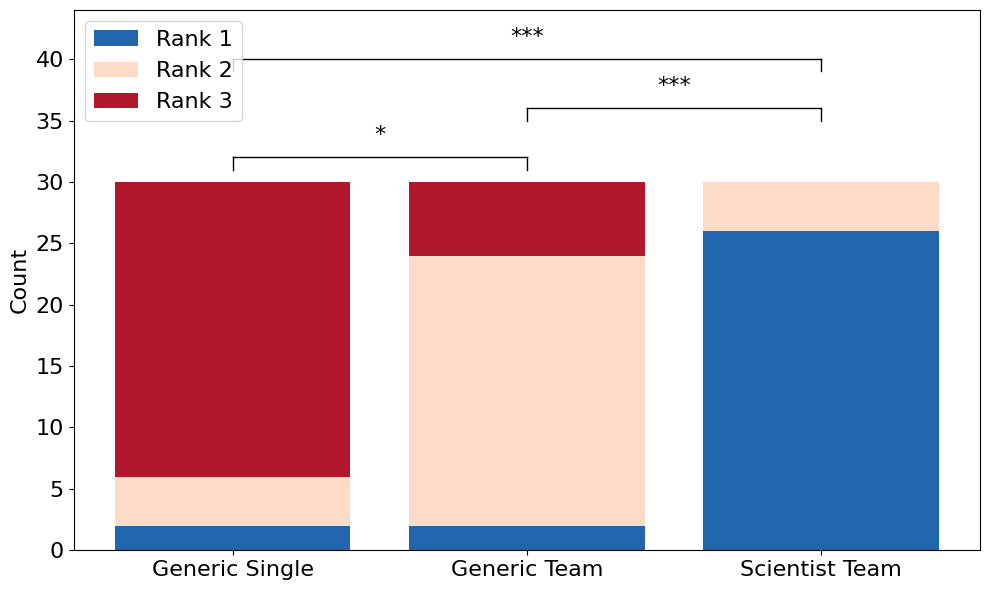

In [71]:
# Calculate counts for each rank (1, 2, 3) for each discussion type
rank_counts = {dtype: {1: 0, 2: 0, 3: 0} for dtype in discussion_type_to_ranks.keys()}
for dtype, ranks in discussion_type_to_ranks.items():
    for rank in ranks:
        rank_counts[dtype][rank] += 1

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

discussion_types = list(rank_counts.keys())
bottoms = np.zeros(len(discussion_types))

# Define colors and labels for the ranks
colors = ['#2166AC', '#FDDBC7', '#B2182B']  # Blue, Light Pink, Dark Red
labels = ['Rank 1', 'Rank 2', 'Rank 3']

for rank in [1, 2, 3]:
    values = [rank_counts[dtype][rank] for dtype in discussion_types]
    formatted_discussion_types = [dtype.replace("_", " ").title() for dtype in discussion_types]
    plt.bar(formatted_discussion_types, values, bottom=bottoms, label=f'Rank {rank}', color=colors[rank-1])
    bottoms += values

fontsize = 16
plt.ylabel('Count', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(loc='upper left', fontsize=fontsize)
plt.ylim(0, 44)

# Add statistical significance annotations
def annotate_significance(ax, p_value, x1, x2, y):
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'ns'  # Not significant

    # Add horizontal line
    ax.plot([x1, x2], [y-2, y-2], color='black', linewidth=1)
    # Add vertical lines
    ax.plot([x1, x1], [y-3, y-2], color='black', linewidth=1)
    ax.plot([x2, x2], [y-3, y-2], color='black', linewidth=1)
    # Add significance marker
    ax.text((x1 + x2) / 2, y-1, significance, ha='center', va='bottom', fontsize=fontsize)

annotate_significance(ax, p_generic_single_vs_generic_team_adj, 0, 1, 34)
annotate_significance(ax, p_generic_single_vs_scientist_team_adj, 0, 2, 42) 
annotate_significance(ax, p_generic_team_vs_scientist_team_adj, 1, 2, 38)

# Make x-axis labels more readable
plt.tight_layout()
plt.savefig(blinded_dir / "rankings.pdf")